# **All_persons_features**

## 0. Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

## 1.Load Data

In [ ]:
df_eeg=pd.read_csv("/content/drive/MyDrive/MLMA_Data/BS-HMS-Dataset/all_persons_features.csv")
# Drop participant 20, 21 ,27 due to lack of data (avtivity < 8)
rows_to_drop = ['Test20', 'Test21', 'Test27']
df_eeg_filtered = df_eeg[~df_eeg['Test'].str.contains('|'.join(rows_to_drop))]
df_eeg_filtered

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,Test
0,23912.058097,-5.090786,-1.491028,-1.816503,-0.039856,0.004918,23943.333260,-0.557060,0.276885,0.129997,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,EEG_Test0_1
1,23938.140667,1.304878,0.523035,-0.000734,0.138114,-0.000725,23930.166019,1.371697,0.204861,0.088420,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,EEG_Test0_2
2,23963.298887,1.335970,0.798692,-0.751814,0.339526,-0.006397,23938.108961,1.472247,0.180649,0.032136,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,EEG_Test0_3
3,23969.644167,-4.001203,-0.188962,0.233066,-0.401017,0.000301,23951.036319,1.713476,-0.229397,-0.216472,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,EEG_Test0_4
4,23951.364927,0.655335,-0.060575,0.085118,-0.195425,-0.003415,23945.335025,0.015047,-0.225376,0.024856,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,EEG_Test0_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,23980.416319,0.491757,0.100662,-0.019101,-0.101720,0.003762,23989.717301,0.167613,-0.074636,-0.118257,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,EEG_Test26_4
212,23929.524102,1.511335,0.700155,0.129721,0.184296,0.004997,23922.768185,0.898569,0.195001,0.151714,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,EEG_Test26_5
213,23951.673480,-1.582431,0.758108,-0.096076,0.126605,0.003738,23946.983749,-0.149871,0.069997,-0.046927,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,EEG_Test26_6
214,23965.454197,-1.797909,-0.710798,-0.041174,-0.015499,0.002591,23960.840545,0.202264,0.051962,-0.127439,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,EEG_Test26_7


In [ ]:
metadata=pd.read_excel("/content/drive/MyDrive/MLMA_Data/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]

metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()

# add Emotion column
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)]
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list]
df_eeg_filtered["Emotion"]=metadata_video_id_list
df_eeg_filtered.drop(columns=['Test'], inplace=True)
df_eeg_filtered

<ipython-input-4-d03044f2f93f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_filtered["Emotion"]=metadata_video_id_list
<ipython-input-4-d03044f2f93f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_filtered.drop(columns=['Test'], inplace=True)


,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,Emotion
0,23912.058097,-5.090786,-1.491028,-1.816503,-0.039856,0.004918,23943.333260,-0.557060,0.276885,0.129997,...,-0.922225,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,1
1,23938.140667,1.304878,0.523035,-0.000734,0.138114,-0.000725,23930.166019,1.371697,0.204861,0.088420,...,0.123359,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,1
2,23963.298887,1.335970,0.798692,-0.751814,0.339526,-0.006397,23938.108961,1.472247,0.180649,0.032136,...,0.998350,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,0
3,23969.644167,-4.001203,-0.188962,0.233066,-0.401017,0.000301,23951.036319,1.713476,-0.229397,-0.216472,...,0.120797,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,0
4,23951.364927,0.655335,-0.060575,0.085118,-0.195425,-0.003415,23945.335025,0.015047,-0.225376,0.024856,...,0.058674,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,23980.416319,0.491757,0.100662,-0.019101,-0.101720,0.003762,23989.717301,0.167613,-0.074636,-0.118257,...,-0.031140,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,1
212,23929.524102,1.511335,0.700155,0.129721,0.184296,0.004997,23922.768185,0.898569,0.195001,0.151714,...,0.001938,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,0
213,23951.673480,-1.582431,0.758108,-0.096076,0.126605,0.003738,23946.983749,-0.149871,0.069997,-0.046927,...,0.162380,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,0
214,23965.454197,-1.797909,-0.710798,-0.041174,-0.015499,0.002591,23960.840545,0.202264,0.051962,-0.127439,...,-0.084029,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,1


## 2. Train Test Split

In [ ]:
# Assign ID for each participant.
folder = [num for num in range(1, 26) for _ in range(8)]
df_eeg_filtered["Folder"]=folder
df_eeg_filtered

<ipython-input-5-bdd75ad6e5a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_filtered["Folder"]=folder


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,Emotion,Folder
0,23912.058097,-5.090786,-1.491028,-1.816503,-0.039856,0.004918,23943.333260,-0.557060,0.276885,0.129997,...,-0.342368,-0.008797,23947.785568,-0.138773,0.263904,0.161817,-0.021692,0.004548,1,1
1,23938.140667,1.304878,0.523035,-0.000734,0.138114,-0.000725,23930.166019,1.371697,0.204861,0.088420,...,0.069284,0.000440,23936.427631,2.035387,0.329784,-0.032609,0.192239,-0.001187,1,1
2,23963.298887,1.335970,0.798692,-0.751814,0.339526,-0.006397,23938.108961,1.472247,0.180649,0.032136,...,0.227824,0.018134,23963.144427,-0.341884,-0.095610,0.030200,-0.066442,0.003880,0,1
3,23969.644167,-4.001203,-0.188962,0.233066,-0.401017,0.000301,23951.036319,1.713476,-0.229397,-0.216472,...,0.007305,0.001021,23956.820391,-1.987978,-0.512351,0.092099,0.072553,-0.000021,0,1
4,23951.364927,0.655335,-0.060575,0.085118,-0.195425,-0.003415,23945.335025,0.015047,-0.225376,0.024856,...,-0.071531,0.000209,23955.644776,-2.499911,-0.072077,0.003461,-0.041627,-0.002911,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,23980.416319,0.491757,0.100662,-0.019101,-0.101720,0.003762,23989.717301,0.167613,-0.074636,-0.118257,...,0.195526,-0.001856,23979.440825,1.298427,0.133997,-0.069612,-0.178514,0.001823,1,25
212,23929.524102,1.511335,0.700155,0.129721,0.184296,0.004997,23922.768185,0.898569,0.195001,0.151714,...,0.110987,0.004296,23926.416068,2.180047,0.453251,0.113384,0.091799,0.003759,0,25
213,23951.673480,-1.582431,0.758108,-0.096076,0.126605,0.003738,23946.983749,-0.149871,0.069997,-0.046927,...,0.074365,0.003413,23950.856864,0.260691,0.227889,-0.016642,0.095920,0.000546,0,25
214,23965.454197,-1.797909,-0.710798,-0.041174,-0.015499,0.002591,23960.840545,0.202264,0.051962,-0.127439,...,-0.141468,0.005208,23964.440151,0.364880,0.262933,-0.173946,-0.076394,0.003002,1,25


In [ ]:
import random
folder_names = [i for i in range(1, 26)]

random.shuffle(folder_names)

# Split into 80:20 train test split
train_split = int(0.8 * len(folder_names))

train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

print(train_folders)
print(test_folders)

[12, 7, 17, 19, 22, 10, 2, 14, 23, 15, 13, 3, 11, 5, 21, 16, 20, 1, 4, 8]
[6, 9, 24, 18, 25]


In [ ]:
train_eeg = df_eeg_filtered[df_eeg_filtered['Folder'].isin(train_folders)]
X_train_eeg =train_eeg.iloc[:,:-2]
y_train_eeg=train_eeg.iloc[:,-2]

test_eeg = df_eeg_filtered[df_eeg_filtered['Folder'].isin(test_folders)]
X_test_eeg =test_eeg.iloc[:,:-2]
y_test_eeg=test_eeg.iloc[:,-2]

## 3. SVM + Cross Validation

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def create_grid_search_svm_model():
    svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
    param_grid = {
        'svc__C': [0.01, 0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    }
    grid_search = GridSearchCV(svm_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
    return grid_search

In [ ]:

fold = 10
cv_scores = []
best_model_eeg = None
best_accuracy_eeg = 0

for i in range(fold):
    random.shuffle(train_folders)

    # Split train folders into 90:10 train validation split
    train_split_cv = int(0.9 * len(train_folders))

    train_folders_cv = train_folders[:train_split_cv]
    val_folders_cv = train_folders[train_split_cv:]

    train_cv = train_eeg[train_eeg['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_eeg[train_eeg['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Grid search
    grid_search_model = create_grid_search_svm_model()
    grid_search_model.fit(X_train_cv, y_train_cv)

    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")
    best_model = grid_search_model.best_estimator_

    # Evaluate the best model on validation set
    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_eeg:
        best_accuracy_eeg = val_accuracy
        best_model_eeg = best_model

# Report the best accuracy
print(f"Best validation accuracy: {best_accuracy_eeg * 100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 1: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Fold 1 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 2: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 2 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 3: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 3 completed. Validation accuracy: 43.75%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 4: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 4 completed. Validation accuracy: 12.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 5: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 5 completed. Validation accuracy: 43.75%
Fitting 3 folds for 

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[16, 8, 21, 23, 11, 19, 7, 5, 20, 17, 3, 12, 10, 14, 15, 1, 13, 2]
[4, 22]


In [ ]:
print(f"Best validation accuracy: {best_accuracy_eeg * 100:.2f}%")

Best validation accuracy: 62.50%


# **Hand_movement**

## 1. Load Data

In [ ]:
df_hand1=pd.read_csv("/content/drive/MyDrive/MLMA_Data/BS-HMS-Dataset/Emotiv_Right_acc_extracted.csv", header = None)
df_hand2=pd.read_csv("/content/drive/MyDrive/MLMA_Data/BS-HMS-Dataset/Emotiv_Right_gyro_extracted.csv", header = None)

In [ ]:
df_hand1 = df_hand1.iloc[1:, :]
df_hand2 = df_hand2.iloc[1:, :]
df_hand1.drop(df_hand1.columns[0], axis=1, inplace=True)
df_hand2.drop(df_hand2.columns[0], axis=1, inplace=True)
df_hand = pd.concat([df_hand1, df_hand2], axis=1)
df_hand

<ipython-input-13-06f701f30a7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency1.drop(df_frequency1.columns[0], axis=1, inplace=True)


,1,2,3,4,5,6,7,8,9,10,...,67,68,69,70,71,72,73,74,75,76
1,-6.846076391056205,1.1273971233354427,1.2710242737050315,-7.2910275459,-9.8665847778,3.0207738876,1.2710242737050315,0.03322120401100907,41.360216942312874,1.039849047322012,...,-0.28217192859600887,0.04947762946158527,1.3171139509680069e-06,0.00630247354280451,3.972117275775083e-05,-2.942487826178466e-07,0.002579871866865548,6.655738849444328e-06,3.9012158191430846,0.06717145374969867
2,2.3786141431815775,0.44530255054907053,0.19829436152550753,2.4271509647,-15.9847288132,19.5943374634,0.19829436152550753,0.28318596854538786,3.9502241321846734,1.3442099327028973,...,0.006878071067057226,-0.021570138141565092,-3.791419442571357e-07,0.018311218157067675,0.0003353007103957249,9.977443620278524e-09,0.008737565987815547,7.634505939143108e-05,5.299956928807462,0.13588127086758195
3,-4.600322761554963,1.2080005561437173,1.45926534364353,-4.3324885368,-8.4112510681,2.4367256165,1.45926534364353,0.02916580677605315,48.09238830046913,1.0152304030950368,...,0.027718787894914016,-0.06602959561607322,2.087315326259049e-07,0.003741142190040713,1.3996144886102623e-05,2.087315236132223e-07,0.0017557739167661324,3.082742046796286e-06,3.7674234563266937,0.0399208794778488
4,2.307474720722851,0.8423992751539888,0.7096365387799658,2.4941730499,-5.5484576225,6.3527207375,0.7096365387799658,0.10866691383778329,10.930010569282418,1.282584269383381,...,0.02133746151179688,-0.18247551717729255,5.823870812559386e-08,0.01148206723860666,0.00013183786807188439,1.1647741661564392e-07,0.005286423541464209,2.7946273859746986e-05,5.899197607900858,0.157682167654952
5,-0.876954370635969,0.603182728716765,0.3638294042222026,-1.0101161003,-5.7112255096,2.8005590439,0.3638294042222026,0.0723522399628254,16.832128776141833,1.235047033841999,...,0.0008509878237105298,0.008885968427184022,-2.10061884848871e-06,0.006216471941421275,3.864452339847799e-05,5.410685485412918e-07,0.002681883493514621,7.192499072786189e-06,2.802608212034055,0.047825210314143336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0266084606874106,0.6730727904506854,0.4530269812450721,-0.8952214122,-7.1665582657,4.2941904068,0.4530269812450721,0.1908760834347988,6.090877048352363,1.3277686088334038,...,-0.10100995563274011,0.004093315262911928,2.519508511831564e-06,0.021358760716026035,0.000456196659324457,-1.619685179804641e-07,0.009887497504551847,9.776260690251901e-05,6.740642517026336,0.21415353067625756
197,0.855077185600118,0.7057801290251298,0.4981255905267289,0.6845811009,-2.9633264542,16.6740970612,0.4981255905267289,0.11730076410682001,10.614548162181148,1.2851431031701372,...,-0.012828259649289435,-0.03873709686050221,-9.003507766678714e-08,0.011652291869770761,0.00013577590581832576,-4.951929115325448e-07,0.005224516741250236,2.7295575179603987e-05,3.689207281490106,0.06254153740475299
198,1.7618456246718657,0.44922076223319873,0.20179929322137605,1.7665064335,-3.7101421356,6.5346374512,0.20179929322137605,0.2415728901636843,5.045189844099646,1.3405444575483814,...,-0.001341979509172419,0.04543643375830525,3.6011529378183094e-07,0.012731447911580611,0.00016208976592529029,4.801537321785345e-07,0.006654036479820084,4.427620147477646e-05,6.2763263355693,0.1942797265972157
199,-0.5309257779718535,1.9174583656411606,3.676646583967271,-0.6941556334,-11.7623472214,10.2208433151,3.676646583967271,0.04949413330856016,22.914339771322226,1.3495125659006204,...,-0.03177423878802547,-0.0986867465966582,4.5291431845740435e-07,0.01579639486816625,0.000249526090831029,-1.1716696351994858e-06,0.007516412943155683,5.6496463532038276e-05,5.348136498483326,0.18827899279061797


In [ ]:
# add target column
df_hand["Emotion"]=metadata_video_id_list
df_hand_filtered=df_hand.copy()
df_hand_filtered

,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,Emotion
1,-6.846076391056205,1.1273971233354427,1.2710242737050315,-7.2910275459,-9.8665847778,3.0207738876,1.2710242737050315,0.03322120401100907,41.360216942312874,1.039849047322012,...,0.04947762946158527,1.3171139509680069e-06,0.00630247354280451,3.972117275775083e-05,-2.942487826178466e-07,0.002579871866865548,6.655738849444328e-06,3.9012158191430846,0.06717145374969867,1
2,2.3786141431815775,0.44530255054907053,0.19829436152550753,2.4271509647,-15.9847288132,19.5943374634,0.19829436152550753,0.28318596854538786,3.9502241321846734,1.3442099327028973,...,-0.021570138141565092,-3.791419442571357e-07,0.018311218157067675,0.0003353007103957249,9.977443620278524e-09,0.008737565987815547,7.634505939143108e-05,5.299956928807462,0.13588127086758195,1
3,-4.600322761554963,1.2080005561437173,1.45926534364353,-4.3324885368,-8.4112510681,2.4367256165,1.45926534364353,0.02916580677605315,48.09238830046913,1.0152304030950368,...,-0.06602959561607322,2.087315326259049e-07,0.003741142190040713,1.3996144886102623e-05,2.087315236132223e-07,0.0017557739167661324,3.082742046796286e-06,3.7674234563266937,0.0399208794778488,0
4,2.307474720722851,0.8423992751539888,0.7096365387799658,2.4941730499,-5.5484576225,6.3527207375,0.7096365387799658,0.10866691383778329,10.930010569282418,1.282584269383381,...,-0.18247551717729255,5.823870812559386e-08,0.01148206723860666,0.00013183786807188439,1.1647741661564392e-07,0.005286423541464209,2.7946273859746986e-05,5.899197607900858,0.157682167654952,0
5,-0.876954370635969,0.603182728716765,0.3638294042222026,-1.0101161003,-5.7112255096,2.8005590439,0.3638294042222026,0.0723522399628254,16.832128776141833,1.235047033841999,...,0.008885968427184022,-2.10061884848871e-06,0.006216471941421275,3.864452339847799e-05,5.410685485412918e-07,0.002681883493514621,7.192499072786189e-06,2.802608212034055,0.047825210314143336,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0266084606874106,0.6730727904506854,0.4530269812450721,-0.8952214122,-7.1665582657,4.2941904068,0.4530269812450721,0.1908760834347988,6.090877048352363,1.3277686088334038,...,0.004093315262911928,2.519508511831564e-06,0.021358760716026035,0.000456196659324457,-1.619685179804641e-07,0.009887497504551847,9.776260690251901e-05,6.740642517026336,0.21415353067625756,1
197,0.855077185600118,0.7057801290251298,0.4981255905267289,0.6845811009,-2.9633264542,16.6740970612,0.4981255905267289,0.11730076410682001,10.614548162181148,1.2851431031701372,...,-0.03873709686050221,-9.003507766678714e-08,0.011652291869770761,0.00013577590581832576,-4.951929115325448e-07,0.005224516741250236,2.7295575179603987e-05,3.689207281490106,0.06254153740475299,0
198,1.7618456246718657,0.44922076223319873,0.20179929322137605,1.7665064335,-3.7101421356,6.5346374512,0.20179929322137605,0.2415728901636843,5.045189844099646,1.3405444575483814,...,0.04543643375830525,3.6011529378183094e-07,0.012731447911580611,0.00016208976592529029,4.801537321785345e-07,0.006654036479820084,4.427620147477646e-05,6.2763263355693,0.1942797265972157,0
199,-0.5309257779718535,1.9174583656411606,3.676646583967271,-0.6941556334,-11.7623472214,10.2208433151,3.676646583967271,0.04949413330856016,22.914339771322226,1.3495125659006204,...,-0.0986867465966582,4.5291431845740435e-07,0.01579639486816625,0.000249526090831029,-1.1716696351994858e-06,0.007516412943155683,5.6496463532038276e-05,5.348136498483326,0.18827899279061797,1


## 2. Train Test Split

In [ ]:
# Assign Folder
df_hand_filtered["Folder"]=folder
df_hand_filtered

,1,2,3,4,5,6,7,8,9,10,...,69,70,71,72,73,74,75,76,Emotion,Folder
1,-6.846076391056205,1.1273971233354427,1.2710242737050315,-7.2910275459,-9.8665847778,3.0207738876,1.2710242737050315,0.03322120401100907,41.360216942312874,1.039849047322012,...,1.3171139509680069e-06,0.00630247354280451,3.972117275775083e-05,-2.942487826178466e-07,0.002579871866865548,6.655738849444328e-06,3.9012158191430846,0.06717145374969867,1,1
2,2.3786141431815775,0.44530255054907053,0.19829436152550753,2.4271509647,-15.9847288132,19.5943374634,0.19829436152550753,0.28318596854538786,3.9502241321846734,1.3442099327028973,...,-3.791419442571357e-07,0.018311218157067675,0.0003353007103957249,9.977443620278524e-09,0.008737565987815547,7.634505939143108e-05,5.299956928807462,0.13588127086758195,1,1
3,-4.600322761554963,1.2080005561437173,1.45926534364353,-4.3324885368,-8.4112510681,2.4367256165,1.45926534364353,0.02916580677605315,48.09238830046913,1.0152304030950368,...,2.087315326259049e-07,0.003741142190040713,1.3996144886102623e-05,2.087315236132223e-07,0.0017557739167661324,3.082742046796286e-06,3.7674234563266937,0.0399208794778488,0,1
4,2.307474720722851,0.8423992751539888,0.7096365387799658,2.4941730499,-5.5484576225,6.3527207375,0.7096365387799658,0.10866691383778329,10.930010569282418,1.282584269383381,...,5.823870812559386e-08,0.01148206723860666,0.00013183786807188439,1.1647741661564392e-07,0.005286423541464209,2.7946273859746986e-05,5.899197607900858,0.157682167654952,0,1
5,-0.876954370635969,0.603182728716765,0.3638294042222026,-1.0101161003,-5.7112255096,2.8005590439,0.3638294042222026,0.0723522399628254,16.832128776141833,1.235047033841999,...,-2.10061884848871e-06,0.006216471941421275,3.864452339847799e-05,5.410685485412918e-07,0.002681883493514621,7.192499072786189e-06,2.802608212034055,0.047825210314143336,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.0266084606874106,0.6730727904506854,0.4530269812450721,-0.8952214122,-7.1665582657,4.2941904068,0.4530269812450721,0.1908760834347988,6.090877048352363,1.3277686088334038,...,2.519508511831564e-06,0.021358760716026035,0.000456196659324457,-1.619685179804641e-07,0.009887497504551847,9.776260690251901e-05,6.740642517026336,0.21415353067625756,1,25
197,0.855077185600118,0.7057801290251298,0.4981255905267289,0.6845811009,-2.9633264542,16.6740970612,0.4981255905267289,0.11730076410682001,10.614548162181148,1.2851431031701372,...,-9.003507766678714e-08,0.011652291869770761,0.00013577590581832576,-4.951929115325448e-07,0.005224516741250236,2.7295575179603987e-05,3.689207281490106,0.06254153740475299,0,25
198,1.7618456246718657,0.44922076223319873,0.20179929322137605,1.7665064335,-3.7101421356,6.5346374512,0.20179929322137605,0.2415728901636843,5.045189844099646,1.3405444575483814,...,3.6011529378183094e-07,0.012731447911580611,0.00016208976592529029,4.801537321785345e-07,0.006654036479820084,4.427620147477646e-05,6.2763263355693,0.1942797265972157,0,25
199,-0.5309257779718535,1.9174583656411606,3.676646583967271,-0.6941556334,-11.7623472214,10.2208433151,3.676646583967271,0.04949413330856016,22.914339771322226,1.3495125659006204,...,4.5291431845740435e-07,0.01579639486816625,0.000249526090831029,-1.1716696351994858e-06,0.007516412943155683,5.6496463532038276e-05,5.348136498483326,0.18827899279061797,1,25


In [ ]:
train_hand = df_hand_filtered[df_hand_filtered['Folder'].isin(train_folders)]
X_train_hand =train_hand.iloc[:,:-2]
y_train_hand=train_hand.iloc[:,-2]

test_hand = df_hand_filtered[df_hand_filtered['Folder'].isin(test_folders)]
X_test_hand =test_hand.iloc[:,:-2]
y_test_hand=test_hand.iloc[:,-2]

## 3. SVM + Cross Validation

In [ ]:

cv_scores_hand = []
best_model_hand = None
best_accuracy_hand = 0
train_folders_name = train_folders.copy()

for i in range(fold):
    random.shuffle(train_folders_name)

    # Split train folders into 90:10 straian validation plit
    train_split_cv = int(0.9 * len(train_folders_name))

    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_hand[train_hand['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_hand[train_hand['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Grid search
    grid_search_model = create_grid_search_svm_model()
    grid_search_model.fit(X_train_cv, y_train_cv)
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")
    best_model = grid_search_model.best_estimator_

    # Evaluate the best model on validation set
    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_hand.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_hand:
        best_accuracy_hand = val_accuracy
        best_model_hand = best_model

# Report the best accuracy
print(f"Best validation accuracy: {best_accuracy_hand * 100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 1: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 1 completed. Validation accuracy: 25.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 2: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 2 completed. Validation accuracy: 37.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 3: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 3 completed. Validation accuracy: 25.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 4: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Fold 4 completed. Validation accuracy: 37.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 5: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 5 completed. Validation accuracy: 37.50%
Fitting 3 folds

# **Combined Features**

## 1. Concatenate Data

In [ ]:
df_eeg_filtered_incomplete=df_eeg_filtered.iloc[:,:-2]
df_combined=pd.concat([df_eeg_filtered_incomplete.reset_index(drop=True), df_hand_filtered.reset_index(drop=True)], axis=1, ignore_index=True)
df_combined

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,23912.058097,-5.090786,-1.491028,-1.816503,-0.039856,0.004918,23943.333260,-0.557060,0.276885,0.129997,...,1.3171139509680069e-06,0.00630247354280451,3.972117275775083e-05,-2.942487826178466e-07,0.002579871866865548,6.655738849444328e-06,3.9012158191430846,0.06717145374969867,1,1
1,23938.140667,1.304878,0.523035,-0.000734,0.138114,-0.000725,23930.166019,1.371697,0.204861,0.088420,...,-3.791419442571357e-07,0.018311218157067675,0.0003353007103957249,9.977443620278524e-09,0.008737565987815547,7.634505939143108e-05,5.299956928807462,0.13588127086758195,1,1
2,23963.298887,1.335970,0.798692,-0.751814,0.339526,-0.006397,23938.108961,1.472247,0.180649,0.032136,...,2.087315326259049e-07,0.003741142190040713,1.3996144886102623e-05,2.087315236132223e-07,0.0017557739167661324,3.082742046796286e-06,3.7674234563266937,0.0399208794778488,0,1
3,23969.644167,-4.001203,-0.188962,0.233066,-0.401017,0.000301,23951.036319,1.713476,-0.229397,-0.216472,...,5.823870812559386e-08,0.01148206723860666,0.00013183786807188439,1.1647741661564392e-07,0.005286423541464209,2.7946273859746986e-05,5.899197607900858,0.157682167654952,0,1
4,23951.364927,0.655335,-0.060575,0.085118,-0.195425,-0.003415,23945.335025,0.015047,-0.225376,0.024856,...,-2.10061884848871e-06,0.006216471941421275,3.864452339847799e-05,5.410685485412918e-07,0.002681883493514621,7.192499072786189e-06,2.802608212034055,0.047825210314143336,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,23980.416319,0.491757,0.100662,-0.019101,-0.101720,0.003762,23989.717301,0.167613,-0.074636,-0.118257,...,2.519508511831564e-06,0.021358760716026035,0.000456196659324457,-1.619685179804641e-07,0.009887497504551847,9.776260690251901e-05,6.740642517026336,0.21415353067625756,1,25
196,23929.524102,1.511335,0.700155,0.129721,0.184296,0.004997,23922.768185,0.898569,0.195001,0.151714,...,-9.003507766678714e-08,0.011652291869770761,0.00013577590581832576,-4.951929115325448e-07,0.005224516741250236,2.7295575179603987e-05,3.689207281490106,0.06254153740475299,0,25
197,23951.673480,-1.582431,0.758108,-0.096076,0.126605,0.003738,23946.983749,-0.149871,0.069997,-0.046927,...,3.6011529378183094e-07,0.012731447911580611,0.00016208976592529029,4.801537321785345e-07,0.006654036479820084,4.427620147477646e-05,6.2763263355693,0.1942797265972157,0,25
198,23965.454197,-1.797909,-0.710798,-0.041174,-0.015499,0.002591,23960.840545,0.202264,0.051962,-0.127439,...,4.5291431845740435e-07,0.01579639486816625,0.000249526090831029,-1.1716696351994858e-06,0.007516412943155683,5.6496463532038276e-05,5.348136498483326,0.18827899279061797,1,25


## 2. Train Test Split

In [ ]:
train_combined = df_combined[df_combined[231].isin(train_folders)]
X_train_combined =train_combined.iloc[:,:-2]
y_train_combined=train_combined.iloc[:,-2]

test_combined = df_combined[df_combined[231].isin(test_folders)]
X_test_combined =test_combined.iloc[:,:-2]
y_test_combined=test_combined.iloc[:,-2]

## 3. SVM + Cross Validation

In [ ]:

cv_scores_combined = []
best_model_combined = 0
best_accuracy_combined = 0
train_folders_name=train_folders.copy()

for i in range(fold):
    random.shuffle(train_folders_name)

    # Split train folders into 90:10 train validation split
    train_split_cv = int(0.9 * len(train_folders_name))

    train_folders_cv = train_folders_name[:train_split_cv]
    val_folders_cv = train_folders_name[train_split_cv:]

    train_cv = train_combined[train_combined[231].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_combined[train_combined[231].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Grid search
    grid_search_model = create_grid_search_svm_model()
    grid_search_model.fit(X_train_cv, y_train_cv)
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")
    best_model = grid_search_model.best_estimator_

    # Evaluate the best model on validation set
    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores_combined.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    if val_accuracy > best_accuracy_combined:
        best_accuracy_combined = val_accuracy
        best_model_combined = best_model

# Report the best accuracy
print(f"Best validation accuracy: {best_accuracy_combined * 100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 1: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 1 completed. Validation accuracy: 25.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 2: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 2 completed. Validation accuracy: 25.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 3: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 3 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 4: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 4 completed. Validation accuracy: 37.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 5: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 5 completed. Validation accuracy: 25.00%
Fitting 3 folds f

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[5, 15, 17, 21, 13, 16, 7, 3, 8, 19, 23, 2, 1, 4, 20, 22, 12, 10]
[14, 11]


# **Evaluation**

# EEG Test Accuracy

Test Accuracy: 72.50%


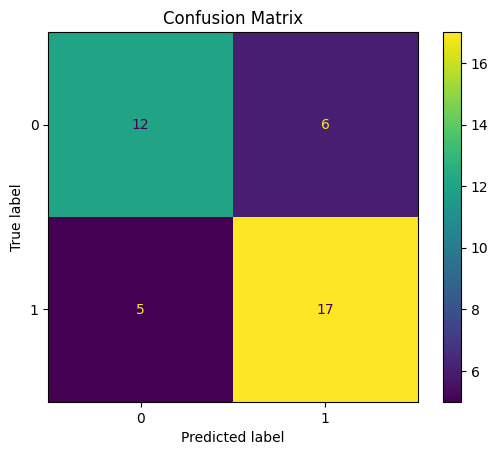

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        18
           1       0.74      0.77      0.76        22

    accuracy                           0.73        40
   macro avg       0.72      0.72      0.72        40
weighted avg       0.72      0.72      0.72        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_eeg = (best_model_eeg.predict(X_test_eeg) > 0.5).astype("int32")

# Test accuracy
test_accuracy_eeg = accuracy_score(y_test_eeg, y_pred_eeg)
print(f"Test Accuracy: {test_accuracy_eeg * 100:.2f}%")

# Confusion matrix
conf_matrix_eeg = confusion_matrix(y_test_eeg, y_pred_eeg)

ConfusionMatrixDisplay(conf_matrix_eeg).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report_eeg = classification_report(y_test_eeg, y_pred_eeg)
print("Classification Report:")
print(report_eeg)

# Hand Test Accuracy

Test Accuracy: 50.00%


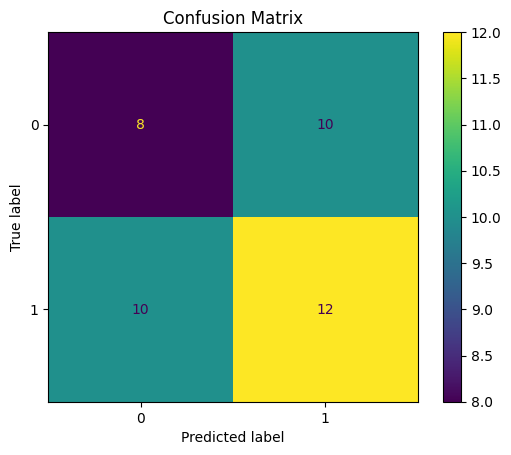

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        18
           1       0.55      0.55      0.55        22

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.50      0.50      0.50        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_hand = (best_model_hand.predict(X_test_hand) > 0.5).astype("int32")

# Test accuracy
test_accuracy_hand = accuracy_score(y_test_hand, y_pred_hand)
print(f"Test Accuracy: {test_accuracy_hand * 100:.2f}%")

# Confusion matrix
conf_matrix_hand = confusion_matrix(y_test_hand, y_pred_hand)

ConfusionMatrixDisplay(conf_matrix_hand).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report_hand = classification_report(y_test_hand, y_pred_hand)
print("Classification Report:")
print(report_hand)

# Combined Test Accuracy


Test Accuracy: 57.50%


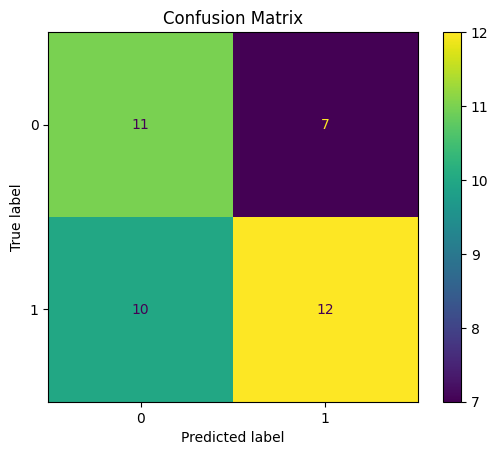

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.61      0.56        18
           1       0.63      0.55      0.59        22

    accuracy                           0.57        40
   macro avg       0.58      0.58      0.57        40
weighted avg       0.58      0.57      0.58        40



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_combined = (best_model_combined.predict(X_test_combined) > 0.5).astype("int32")

# Test accuracy
test_accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
print(f"Test Accuracy: {test_accuracy_combined * 100:.2f}%")

# Confusion matrix
conf_matrix_combined = confusion_matrix(y_test_combined, y_pred_combined)

ConfusionMatrixDisplay(conf_matrix_combined).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report_combined = classification_report(y_test_combined, y_pred_combined)
print("Classification Report:")
print(report_combined)

# ROC curves

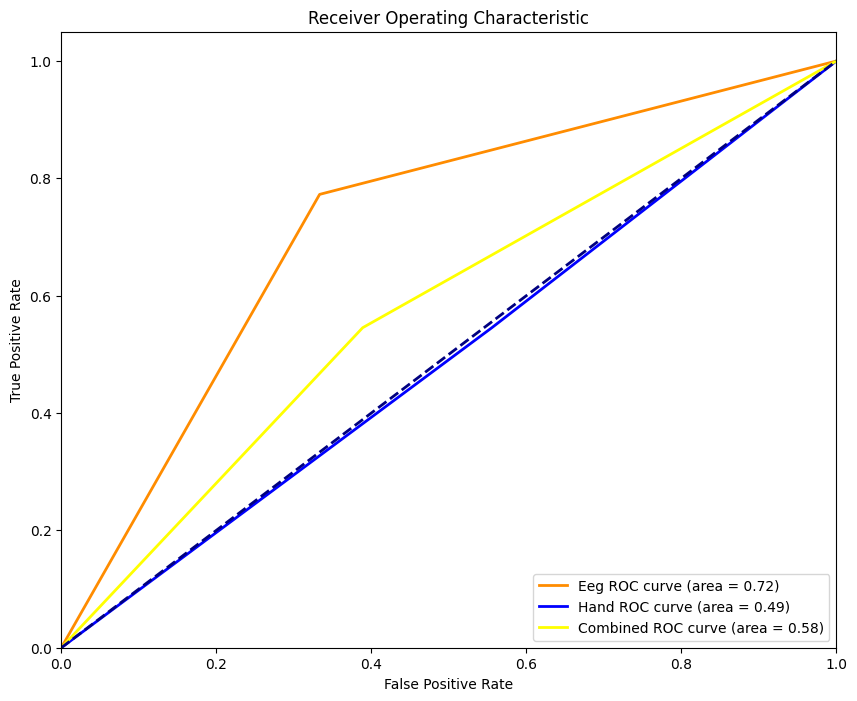

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_probs_eeg = best_model_eeg.predict(X_test_eeg).ravel()
y_pred_probs_hand = best_model_hand.predict(X_test_hand).ravel()
y_pred_probs_combined = best_model_combined.predict(X_test_combined).ravel()

# Compute the ROC curve for each model
fpr_eeg, tpr_eeg, thresholds_eeg = roc_curve(y_test_eeg, y_pred_probs_eeg)
roc_auc_eeg = auc(fpr_eeg, tpr_eeg)

fpr_hand, tpr_hand, thresholds_hand = roc_curve(y_test_hand, y_pred_probs_hand)
roc_auc_hand = auc(fpr_hand, tpr_hand)

fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_test_combined, y_pred_probs_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_eeg, tpr_eeg, color='darkorange', lw=2, label='Eeg ROC curve (area = %0.2f)' % roc_auc_eeg)
plt.plot(fpr_hand, tpr_hand, color='blue', lw=2, label='Hand ROC curve (area = %0.2f)' % roc_auc_hand)
plt.plot(fpr_combined, tpr_combined, color='yellow', lw=2, label='Combined ROC curve (area = %0.2f)' % roc_auc_combined)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()